# Train Simulation

## Overview
A train network operator wants to find the minimum number of parallel tracks in the train network so that mean delay is smaller than 10 minutes.

- The network has ten track segments and five stations. Each segment has a fixed number of parallel tracks that indicate how many trains can be on the segment at the same time.

- The number of parallel tracks can only be set for all segments at once.

- Each train has a departure station and an arrival station. These are randomly chosen from the five stations.

- A train must pass through a sequence of segments in the correct order to reach its destination. The sequence of segments that a train must pass through is determined by the departure and arrival stations of the train. Passing thorugh one segment always takes 15 minutes.

- When a train requests access to a segment, it must wait until a track becomes available. The time spent waiting is recorded in a list called `delays`.

- After a train has passed through a segment, it continues on to the next segment in the sequence until it reaches its destination.

- There are 500 trains. 25 Trains are ready to leave the station every 30 minutes beginning at minute 0 of the simulation time.

## Scenario Analysis

The network operator wants to keep the mean delay below 30 minutes.<br>
Determine the minimum number of parallel tracks that achieve that goal. <br>
Consider 800 operational minutes of the network. <br>
There is no need to account for possible trains who have not arrived
in their destination after the operational minutes.


## Task
Setup the simulation and find the optimal capacity for the resources according to the business goal.<br>
Do so, by utilizing the code which plots the performance against the capacity.<br>
Use comments to provide your answer.<br>
It is not required to comment your code.<br>
However, it may help yourself and us to keep track of what you're doing.

Hand in the filled out notebook by Feb 10th 2023 03:00 PM via mail to feddersen@bwl.uni-kiel.de and cleophas@bwl.uni-kiel.de.

In [254]:
### IMPORTS

import simpy
import numpy as np
import matplotlib.pyplot as plt

#np.random.seed(110)
env = simpy.Environment()

### ENTITY PROCESS
# One train passing which passes through its segment_path, waiting for segments to become available

        
passthrough_time = 15
operation_minutes = 800
n_trains = 500
earliest_dep = np.repeat(np.arange(0,571,30),repeats=n_trains / 20)

def create_segments_and_paths(env,num_parallel_tracks):

    segment1 = simpy.Resource(env, capacity=num_parallel_tracks)
    segment2 = simpy.Resource(env, capacity=num_parallel_tracks)
    segment3 = simpy.Resource(env, capacity=num_parallel_tracks)
    segment4 = simpy.Resource(env, capacity=num_parallel_tracks)
    segment5 = simpy.Resource(env, capacity=num_parallel_tracks)
    segment6 = simpy.Resource(env, capacity=num_parallel_tracks)
    segment7 = simpy.Resource(env, capacity=num_parallel_tracks)
    segment8 = simpy.Resource(env, capacity=num_parallel_tracks)
    segment9 = simpy.Resource(env, capacity=num_parallel_tracks)
    segment10 = simpy.Resource(env, capacity=num_parallel_tracks)
    
    # Beschreibt wie die Bahnhöfe durch die Segmente verbunden sind 
    segment_paths = {
        (1, 2): [segment1, segment3, segment5],
        (1, 3): [segment1, segment2, segment4, segment6],
        (1, 4): [segment1, segment7, segment8],
        (1, 5): [segment1, segment9, segment10],
        (2, 3): [segment2, segment4, segment6],
        (2, 4): [segment2, segment5, segment7, segment8],
        (2, 5): [segment2, segment5, segment9, segment10],
        (3, 4): [segment3, segment7, segment8],
        (3, 5): [segment3, segment9, segment10],
        (4, 5): [segment4, segment8, segment9, segment10],
    }
    add_to_dict = {}
    for (start, end), segments in segment_paths.items():
        add_to_dict[(end, start)] = segments[::-1]

    segment_paths.update(add_to_dict)

    segments = [segment1, segment2, segment3, segment4, segment5, segment6, segment7, segment8, segment9, segment10]
    return segments, segment_paths

delays = []
def train(env, num_parallel_tracks,departure,ID,trains = 25, time_per_segement = 15):    
    a  = np.random.randint(low=1,high=4,size=1)
    if a[0]<4:
        b  = np.random.randint(low=a+1, high =5,size=1)
    b  = np.random.randint(low=a+1, high =5,size=1)
    
    segments, segment_paths = create_segments_and_paths(env,num_parallel_tracks)
    
    yield env.timeout(departure)
    
    start = env.now
    for track in segment_paths[a[0],b[0]]:
        
        with track.request() as seg:  
             # Waiting for Access to the ressource
            t_req = env.now
            yield seg     
             # Measure delay and add it to the delays list           
            t_wait = env.now - t_req
            #print(t_wait)
            delays.append(t_wait)
            yield env.timeout(time_per_segement)
    end = env.now    
    delay = end - start - 45 # regelzeit 45 min
    #print(delay)
    list_of_delays.append(delay)
    
parallel_tracks = list(range(1,21))

train_ID = 0
mean_delays = []
list_of_delays = []



for tracks in parallel_tracks:
    for dep in earliest_dep:
        train_ID += 1
        env.process(train(env,tracks,dep,train_ID))
    # create a mean delay for every parallel track 
    if sum(list_of_delays) ==0: # avoid dividing by zero 
        mean_delays.append(0)
    else:
        mean_delays.append(sum(list_of_delays)/len(list_of_delays))
    list_of_delays = []
     # clear list of delays
    
env.run(800)
print(f'Total mean delay time is {sum(delays)/len(delays)}, marco')
print(f'Total mean delay time is {sum(list_of_delays)/len(list_of_delays)}, lukas')
print(f'Total mean delay time is {sum(mean_delays)/len(mean_delays)}')




Total mean delay time is 0.0, marco
Total mean delay time is 4.1085, lukas
Total mean delay time is 0.0


In [255]:
print(len(list_of_delays),len(mean_delays), sum(mean_delays))

10000 20 0


In [258]:

print(mean_delays)
print(list_of_delays)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

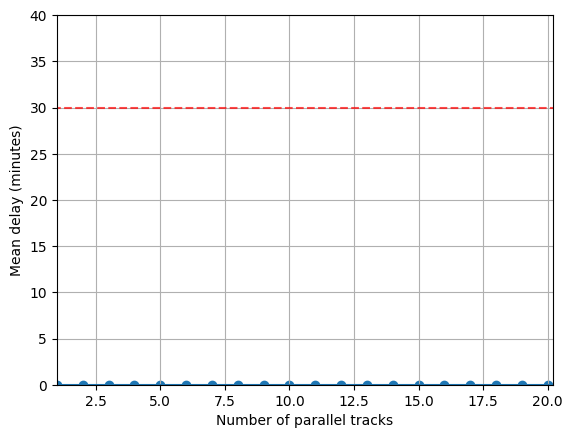

In [211]:
# PLOT RESULTS
plt.plot(parallel_tracks, mean_delays)
plt.scatter(parallel_tracks, mean_delays)
#plt.xticks(parallel_tracks)
plt.ylim(0,40)
plt.xlim(1,max(parallel_tracks)+0.2)
plt.hlines(30,0,max(parallel_tracks)+0.2,color='red',ls='--',alpha=0.7)
plt.xlabel('Number of parallel tracks')
plt.ylabel('Mean delay (minutes)')
plt.grid()